<a href="https://colab.research.google.com/github/milktea292/semester_project/blob/master/Faster_RCNN_CV2_Spring_2021_%7C_Detectron2_practical_%7C_In_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install Detectron2. Note: after installation, you need to "restart runtime" in Colab.

In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

# Protip: if you want to delete non-empty folders in Google Colab:
# import shutil
# shutil.rmtree('./folder_name')

     |████████████████████████████████| 276kB 29.9MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=16825c1ccd8b25f555d81b754f08380c11aded37b5ab186116f1dc9ff715b3fd
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.8.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# See https://detectron2.readthedocs.io/tutorials/install.html for more instructions, if needed
import torch
assert torch.__version__.startswith("1.8") # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html
     |████████████████████████████████| 6.2MB 574kB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=ec6acc490bfcc7d3d843ffcd3869130ba4ae41d1576b3117650a2f9766bccc6b
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
Successfully built fvcore


## Loading Detectron2 and other basic libraries, used later

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# Import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# Step 2: Run Detectron2 on your webcam.

### First test your camera capture capability. Important: you need to give your browser rights to access your webcam.

In [ ]:
# from IPython.display import display, Javascript
# from google.colab.output import eval_js
# from io import StringIO
# import numpy as np
# import base64
# import cv2

# def take_photo(filename='cam.jpg', quality=0.8, to_disk=True):

#     js = Javascript('''
#         async function takePhoto(quality) {
#             const div = document.createElement('div');
#             const capture = document.createElement('button');
#             capture.textContent = 'Capture';
#             div.appendChild(capture);

#             const video = document.createElement('video');
#             video.style.display = 'block';
#             const stream = await navigator.mediaDevices.getUserMedia({video: true});

#             document.body.appendChild(div);
#             div.appendChild(video);
#             video.srcObject = stream;
#             await video.play();

#             // Resize the output to fit the video element.
#             google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

#             // Wait for Capture to be clicked.
#             await new Promise((resolve) => capture.onclick = resolve);

#             const canvas = document.createElement('canvas');
#             canvas.width = video.videoWidth;
#             canvas.height = video.videoHeight;
#             canvas.getContext('2d').drawImage(video, 0, 0);
#             stream.getVideoTracks()[0].stop();
#             div.remove();
#             return canvas.toDataURL('image/jpeg', quality);
#         }
#     ''')
#     display(js)
#     data = eval_js('takePhoto({})'.format(quality))

#     if to_disk:
#         binary = base64.b64decode(data.split(',')[1])
#         with open(filename, 'wb') as f:
#             f.write(binary)
#         return filename

#     else:

#         # sbuf = StringIO()
#         # print("decoding")
#         # d = b64decode(data.split(',')[1])
#         # print("writing d")
#         # sbuf.write(d)
#         # print("cv2 conv")
#         # pimg = Image.open(sbuf)
#         # return cv2.cvtColor(np.array(pimg), cv2.COLOR_RGB2BGR)

#         # print(data)
#         decoded_data = base64.b64decode(data.split(',')[1])
#         nparr = np.fromstring(decoded_data, np.uint8)
#         img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
#         # print(type(img))
        
#         return img


# print("OK")
# # Capture demo:

# from IPython.display import Image
# from google.colab.patches import cv2_imshow
# try:

#     frame = take_photo(to_disk=False)
#     cv2_imshow(frame)

# except Exception as err:
#     # Errors will be thrown if the user does not have a webcam or if they do not
#     # grant the page permission to access it.
#     print(str(err))


### Now load an example model from Detectron2 model zoo

In [ ]:
# selectedModel = "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
selectedModel = "COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"

# Task *** Repeat the whole practical with another model published at
# https://github.com/facebookresearch/detectron2/tree/master/configs/COCO-InstanceSegmentation
# e.g., a larger one: "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
# Try to observe the differences in training time and accuracy.

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(selectedModel))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(selectedModel)
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:06, 19.6MB/s]                           


### And run this model on your webcam samples

In [ ]:
# # Frame capture loop
# while True:

#     try:
#         frame = take_photo(to_disk=False)
        
#         # Predict
#         outs = predictor(frame)

#         # Look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification.
#         print(outs["instances"].pred_classes)
#         print(outs["instances"].pred_boxes)

#         # Use `Visualizer` to draw the predictions on the image.
#         v = Visualizer(
#             frame[:, :, ::-1],
#             MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
#             scale=0.8
#         )
#         v = v.draw_instance_predictions(outs["instances"].to("cpu"))
#         cv2_imshow(v.get_image()[:, :, ::-1])
        
#     except:
#         break


### If you do not have a webcam, take a picture of yourself and load it instead of a webcam picture. Below is also a simple code demonstrating how to make predictions on COCO test images.

In [ ]:
# images = {
#     '000000000001.jpg': None,
#     '000000000300.jpg': None,
#     '000000000311.jpg': None,
# }
# path = "http://images.cocodataset.org/test-stuff2017/"

# for img_name in images.keys():

#     !wget $path$img_name -O $img_name
#     images[img_name] = cv2.imread(img_name)
#     cv2_imshow(images[img_name])


### Run the inference on loaded images:

In [ ]:
# # Predict
# outputs = {}
# for name, im in images.items():
#     outputs[name] = predictor(im)

# # Look at the outputs. Again, you may see https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for description of the output
# for name, outs in outputs.items():
#     print(name)
#     print(outs["instances"].pred_classes)
#     print(outs["instances"].pred_boxes)

In [ ]:
# # We can use `Visualizer` to draw the predictions on the image.
# for name, outs in outputs.items():
#     v = Visualizer(
#         images[name][:, :, ::-1],
#         MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
#         scale=0.8
#     )
#     v = v.draw_instance_predictions(outs["instances"].to("cpu"))
#     cv2_imshow(v.get_image()[:, :, ::-1])


# Step 3: Train on a custom dataset

We will use [the balloon segmentation dataset](https://github.com/matterport/Mask_RCNN/tree/master/samples/balloon), which only has one class: balloon.

The existing Detectron2 model will be finetuned to **detect a new class** ("balloon"), which was not included before into the COCO dataset used in Detectron2 training.

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# First download and decompress the custom dataset data
# !wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
# !unzip cv2_merge.v1i.coco.zip > /dev/null
# !unzip train_copy.zip > /dev/null
!unzip Occluded_final.zip > /dev/null
# !unzip balloon_dataset.zip > /dev/null

Register the "balloon" dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).
This dataset is in its custom format, therefore we need to adapt it to Detectron2 format. See the above tutorial for more details, especially when you want to adapt your annotations to train Detectron2 on your data.


In [ ]:
# If your dataset is in COCO format, this cell can be replaced by the following three lines:
from detectron2.data.datasets import register_coco_instances
# baseroot = '/content/Occluded_final'
baseroot = '/content/2021_project/Occluded_final'
register_coco_instances("my_dataset_train", {}, baseroot+"/train_copy/_annotations.coco_copy.json", baseroot+"/train_copy/")
register_coco_instances("my_dataset_val", {}, baseroot+"/valid/_annotations.coco.json", baseroot+"/valid/")

In [ ]:
# # If your dataset is in COCO format, this cell can be replaced by the following three lines:
# # from detectron2.data.datasets import register_coco_instances
# # register_coco_instances("my_dataset_train", {}, "json_annotation_train.json", "path/to/image/dir")
# # register_coco_instances("my_dataset_val", {}, "json_annotation_val.json", "path/to/image/dir")

# import os
# import numpy as np
# import json
# from detectron2.structures import BoxMode

# def get_Eric_DS_dicts(img_dir):
#     json_file = os.path.join(img_dir, "_annotations.coco.json")
#     with open(json_file) as f:
#         imgs_anns = json.load(f)

#     dataset_dicts = []
#     for idx, v in enumerate(imgs_anns.values()):
#         record = {}
        
#         filename = os.path.join(img_dir, v["filename"])
#         height, width = cv2.imread(filename).shape[:2]
        
#         record["file_name"] = filename
#         record["image_id"] = idx
#         record["height"] = height
#         record["width"] = width
      
#         annos = v["regions"]
#         objs = []
#         for _, anno in annos.items():
#             assert not anno["region_attributes"]
#             anno = anno["shape_attributes"]
#             px = anno["all_points_x"]
#             py = anno["all_points_y"]
#             poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
#             poly = [p for x in poly for p in x]

#             obj = {
#                 "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
#                 "bbox_mode": BoxMode.XYXY_ABS,
#                 "segmentation": [poly],
#                 "category_id": 0,
#                 "iscrowd": 0
#             }
#             objs.append(obj)
#         record["annotations"] = objs
#         dataset_dicts.append(record)
#     return dataset_dicts

# from detectron2.data import DatasetCatalog, MetadataCatalog
# for d in ["train", "val"]:
#     DatasetCatalog.register("ERIC_DS_" + d, lambda d=d: get_Eric_DS_dicts("ERIC_DS/" + d))
#     MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"])
# balloon_metadata = MetadataCatalog.get("balloon_train")

To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



WARNING [05/16 02:33:41 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/16 02:33:41 d2.data.datasets.coco]: Loaded 408 images in COCO format from /content/2021_project/Occluded_final/train_copy/_annotations.coco_copy.json


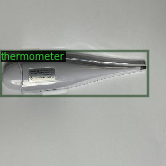

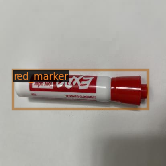

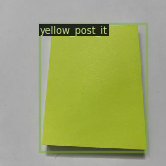

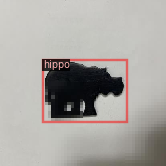

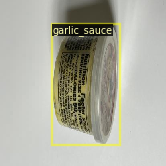

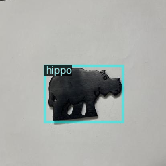

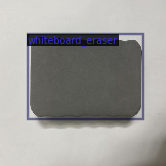

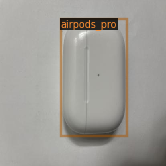

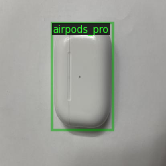

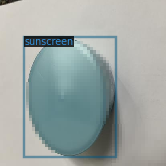

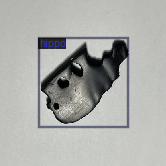

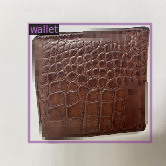

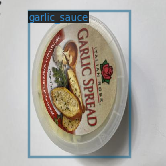

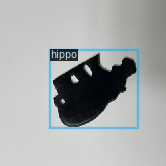

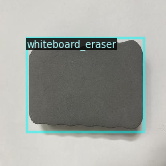

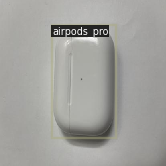

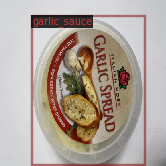

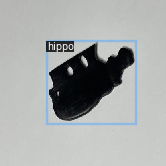

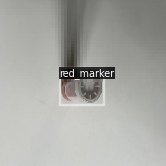

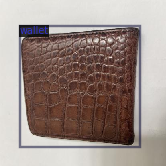

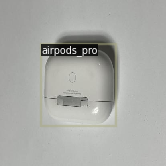

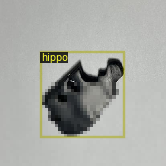

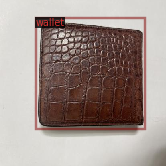

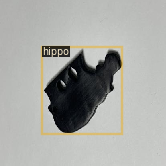

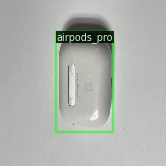

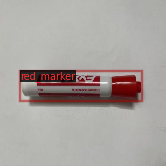

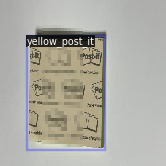

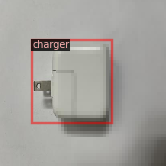

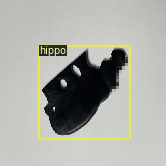

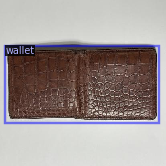

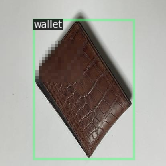

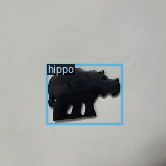

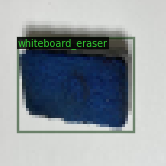

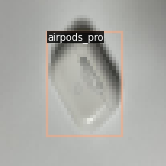

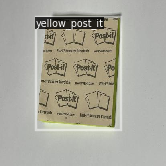

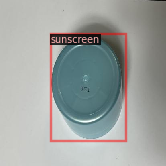

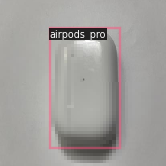

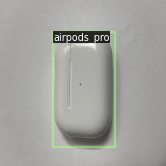

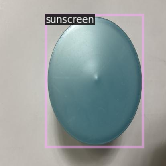

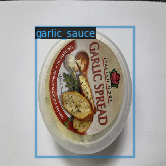

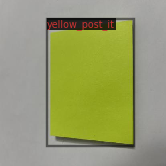

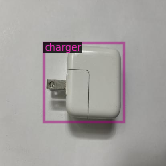

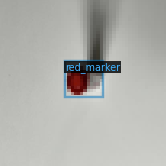

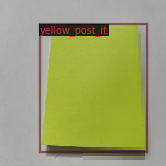

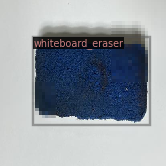

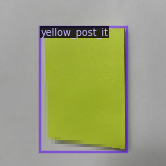

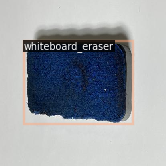

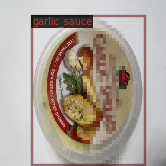

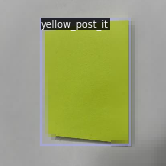

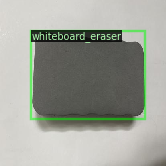

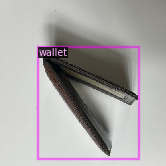

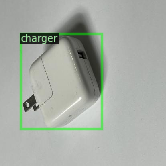

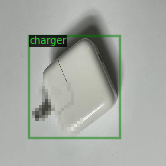

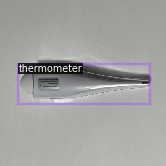

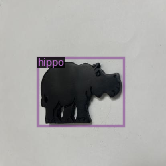

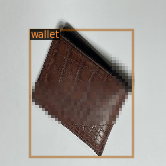

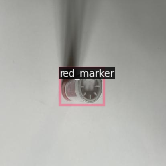

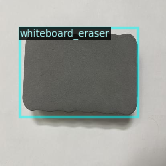

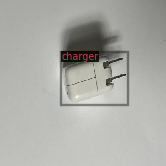

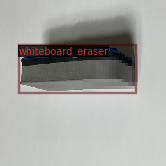

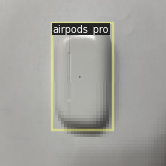

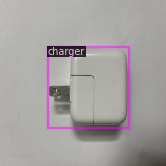

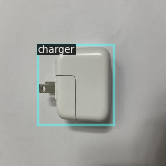

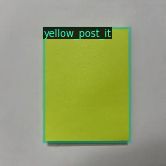

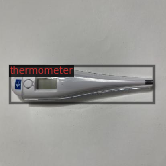

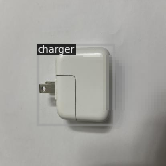

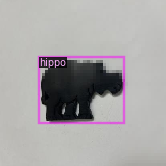

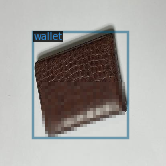

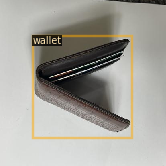

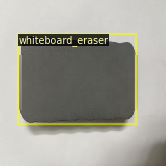

In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
dataset_dicts = DatasetCatalog.get("my_dataset_train")
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
# dataset_dicts = get_balloon_dicts("balloon/train")
for d in random.sample(dataset_dicts, 70):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.4)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

### Let's create a hook to compute our validation loss every few iterations

In [ ]:
from detectron2.engine.hooks import HookBase
from detectron2.evaluation import inference_context
from detectron2.utils.logger import log_every_n_seconds
from detectron2.data import DatasetMapper, build_detection_test_loader
import detectron2.utils.comm as comm
import logging
import torch
import time
import datetime
import os
import numpy as np
import json
from detectron2.structures import BoxMode


class LossEvalHook(HookBase):
    def __init__(self, eval_period, model, data_loader):
        self._model = model
        self._period = eval_period
        self._data_loader = data_loader
    
    def _do_loss_eval(self):
        # Copying inference_on_dataset from evaluator.py
        total = len(self._data_loader)
        num_warmup = min(5, total - 1)
            
        start_time = time.perf_counter()
        total_compute_time = 0
        losses = []
        for idx, inputs in enumerate(self._data_loader):            

            if idx == num_warmup:
                start_time = time.perf_counter()
                total_compute_time = 0
            start_compute_time = time.perf_counter()

            if torch.cuda.is_available():
                torch.cuda.synchronize()

            total_compute_time += time.perf_counter() - start_compute_time
            iters_after_start = idx + 1 - num_warmup * int(idx >= num_warmup)
            seconds_per_img = total_compute_time / iters_after_start

            if idx >= num_warmup * 2 or seconds_per_img > 5:

                total_seconds_per_img = (time.perf_counter() - start_time) / iters_after_start
                eta = datetime.timedelta(seconds=int(total_seconds_per_img * (total - idx - 1)))
                log_every_n_seconds(
                    logging.INFO,
                    "Loss on Validation  done {}/{}. {:.4f} s / img. ETA={}".format(
                        idx + 1, total, seconds_per_img, str(eta)
                    ),
                    n=5,
                )
                
            loss_batch = self._get_loss(inputs)
            losses.append(loss_batch)
        
        mean_loss = np.mean(losses)
        self.trainer.storage.put_scalar('validation_loss', mean_loss)
        comm.synchronize()

        return losses


    def _get_loss(self, data):
        # How loss is calculated on train_loop 
        metrics_dict = self._model(data)
        metrics_dict = {
            k: v.detach().cpu().item() if isinstance(v, torch.Tensor) else float(v)
            for k, v in metrics_dict.items()
        }
        total_losses_reduced = sum(loss for loss in metrics_dict.values())
        return total_losses_reduced


    def after_step(self):
        next_iter = self.trainer.iter + 1
        is_final = next_iter == self.trainer.max_iter
        if is_final or (self._period > 0 and next_iter % self._period == 0):
            self._do_loss_eval()
        self.trainer.storage.put_scalars(timetest=12)


In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
class MyTrainer(DefaultTrainer):
    
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)
                     
    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1, LossEvalHook(
            cfg.TEST.EVAL_PERIOD,
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg,True)
            )
        ))
        return hooks


### We are ready to train!

It takes ~6 minutes to fine-tune "mask_rcnn_R_50_FPN_3x" for 300 iterations on Colab's K80 GPU, or ~2 minutes on a P100 GPU. After fine-tuning your new model can be found in "./output/model_final.pth"


In [ ]:
# Task *** Look at various training curves (e.g., total loss function and its components) in Tensorboard:
#           The plots will appear soon after the training starts.
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
from detectron2.config import get_cfg

cfg = get_cfg()
preTrainedModel = selectedModel
cfg.merge_from_file(model_zoo.get_config_file(preTrainedModel))

# training
cfg.DATASETS.TRAIN = ("my_dataset_train",)

# validation
cfg.DATASETS.TEST = ("my_dataset_val", )
cfg.TEST.EVAL_PERIOD = 100

# let training initialize from model zoo
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(preTrainedModel)  
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 1500    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10  # only has one class (ballon)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)     # will use the Detectron2 default trainer
trainer = MyTrainer(cfg)            # will use our custom trainer that computes the validation losses too
trainer.resume_or_load(resume=False)
trainer.train()


[05/16 02:33:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (11, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (11,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (40, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (40,) in the model! You might want to double check if this is expected.


[05/16 02:33:50 d2.engine.train_loop]: Starting training from iteration 0
[05/16 02:34:00 d2.utils.events]:  eta: 0:11:30  iter: 19  total_loss: 3.242  loss_cls: 2.278  loss_box_reg: 0.6681  loss_rpn_cls: 0.148  loss_rpn_loc: 0.07542  time: 0.4703  data_time: 0.0154  lr: 4.9953e-06  max_mem: 1896M
[05/16 02:34:09 d2.utils.events]:  eta: 0:11:22  iter: 39  total_loss: 2.867  loss_cls: 2.065  loss_box_reg: 0.5358  loss_rpn_cls: 0.1321  loss_rpn_loc: 0.05838  time: 0.4720  data_time: 0.0059  lr: 9.9902e-06  max_mem: 1896M
[05/16 02:34:19 d2.utils.events]:  eta: 0:11:15  iter: 59  total_loss: 2.533  loss_cls: 1.665  loss_box_reg: 0.6721  loss_rpn_cls: 0.1216  loss_rpn_loc: 0.07289  time: 0.4736  data_time: 0.0046  lr: 1.4985e-05  max_mem: 1896M
[05/16 02:34:28 d2.utils.events]:  eta: 0:11:10  iter: 79  total_loss: 1.948  loss_cls: 1.057  loss_box_reg: 0.7186  loss_rpn_cls: 0.08274  loss_rpn_loc: 0.05784  time: 0.4777  data_time: 0.0063  lr: 1.998e-05  max_mem: 1896M
WARNING [05/16 02:34:38

# Step 4. Inference & evaluation using the fine-tuned model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor **using the model we've just trained**:



In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model  0.4: bag/tie labeled as balloons, 0.8: multiple bolloons not being labeled
cfg.DATASETS.TEST = ("my_dataset_val", )
predictor = DefaultPredictor(cfg)

WARNING [05/16 02:53:07 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/16 02:53:07 d2.data.datasets.coco]: Loaded 90 images in COCO format from /content/2021_project/Occluded_final/valid/_annotations.coco.json


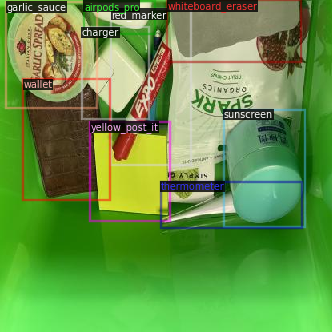

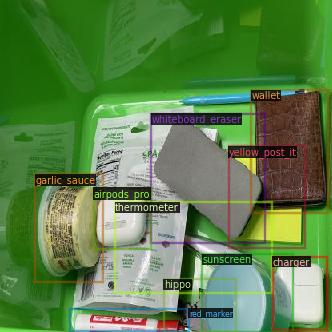

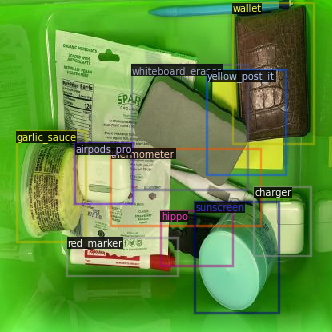

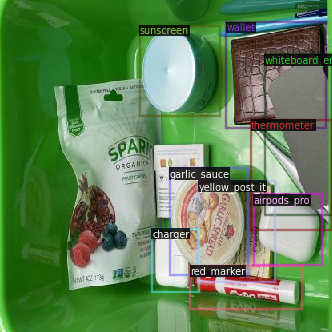

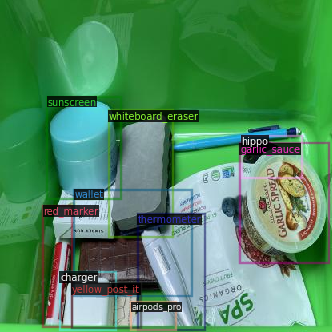

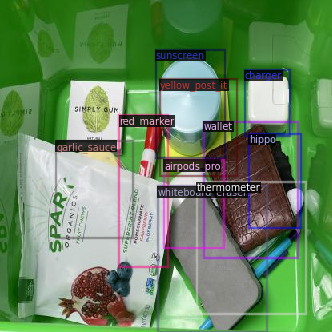

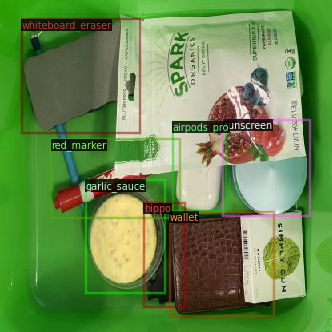

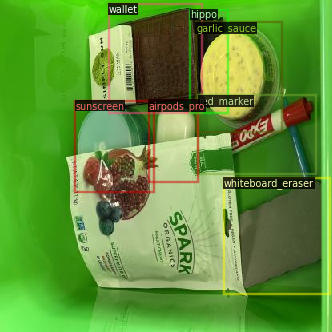

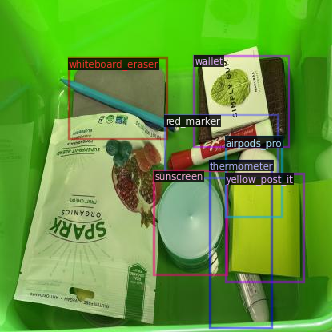

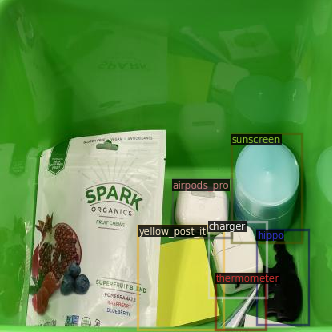

In [ ]:
# Task *** Select (randomly) several samples from the "balloon" validation set and visualize the prediction results. 
# You can use pieces of the code from above sections.
# dataset_dicts = get_balloon_dicts("balloon/val")
# ...


dataset_dicts = DatasetCatalog.get("my_dataset_val")
my_dataset_val_metadata = MetadataCatalog.get("my_dataset_val")
for d in random.sample(dataset_dicts, 10):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_val_metadata, scale=0.8)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])



We can also evaluate its performance using AP metric implemented in COCO API.

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator("my_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [05/16 02:53:08 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [05/16 02:53:08 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/16 02:53:08 d2.data.datasets.coco]: Loaded 90 images in COCO format from /content/2021_project/Occluded_final/valid/_annotations.coco.json
[05/16 02:53:08 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/16 02:53:08 d2.data.common]: Serializing 90 elements to byte tensors and concatenating them all ...
[05/16 02:53:08 d2.data.common]: Serialized dataset takes 0.05 MiB
[05/16 02:53:08 d2.evaluation.evaluator]: Start inference on 90 images
[05/16 02:53:10 d2.evaluation.evaluator]: Inference done 11/90. 0.1489 s / img. ETA=0:00:11
[05/16 02:53:15 d2.evaluation.evalua

OrderedDict([('bbox',
              {'AP': 13.958354136724704,
               'AP-airpods_pro': 12.085387844757681,
               'AP-charger': 19.47460857664998,
               'AP-cv2': nan,
               'AP-garlic_sauce': 23.51043773839369,
               'AP-hippo': 4.985426981864689,
               'AP-red_marker': 19.805907304336593,
               'AP-sunscreen': 36.653767683325434,
               'AP-thermometer': 0.0,
               'AP-wallet': 14.579413629740085,
               'AP-whiteboard_eraser': 8.488591608178872,
               'AP-yellow_post_it': 0.0,
               'AP50': 23.776044474834247,
               'AP75': 15.971626786691242,
               'APl': 11.16706408038144,
               'APm': 21.033737364275925,
               'APs': nan})])

In [ ]:
# Task *** Upload some pictures with balloons from the Internet, do the prediction and display the result.

# You can use pieces of the code from above sections.
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))
    return cv2.resize(image, dim, interpolation=inter)

path = baseroot+"/test/"
for filename in os.listdir(path):
    if filename == '.ipynb_checkpoints': pass
    else:
      img = cv2.imread(os.path.join(path,filename))
      img = ResizeWithAspectRatio(img, width=1680) ## for display purpose
      outs = predictor(img)
      print(outs["instances"].pred_classes)
      print(outs["instances"].pred_boxes)

      # Use `Visualizer` to draw the predictions on the image.
      v = visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_val_metadata, scale=0.4)
      v = v.draw_instance_predictions(outs["instances"].to("cpu"))
      cv2_imshow(v.get_image()[:, :, ::-1])
    


## Plot validation and training losses together

Or any other recorded metric, without Tensorboard.

In [ ]:
#!rm output/metrics.json                # to clear the plot below
#!rm output/events.out.tfevents.*       # to clear the tensorboard plots
!ls -alh output/inference
!ls -alh output/

total 524K
drwxr-xr-x 2 root root 4.0K May 16 02:34 .
drwxr-xr-x 3 root root 4.0K May 16 02:53 ..
-rw-r--r-- 1 root root 342K May 16 02:53 coco_instances_results.json
-rw-r--r-- 1 root root 169K May 16 02:53 instances_predictions.pth
total 253M
drwxr-xr-x 3 root root 4.0K May 16 02:53 .
drwxr-xr-x 1 root root 4.0K May 16 02:33 ..
-rw-r--r-- 1 root root 342K May 16 02:53 coco_instances_results.json
-rw-r--r-- 1 root root  82K May 16 02:53 events.out.tfevents.1621132429.cde682ce5935.58.0
drwxr-xr-x 2 root root 4.0K May 16 02:34 inference
-rw-r--r-- 1 root root 169K May 16 02:53 instances_predictions.pth
-rw-r--r-- 1 root root   15 May 16 02:52 last_checkpoint
-rw-r--r-- 1 root root  53K May 16 02:53 metrics.json
-rw-r--r-- 1 root root 253M May 16 02:52 model_final.pth


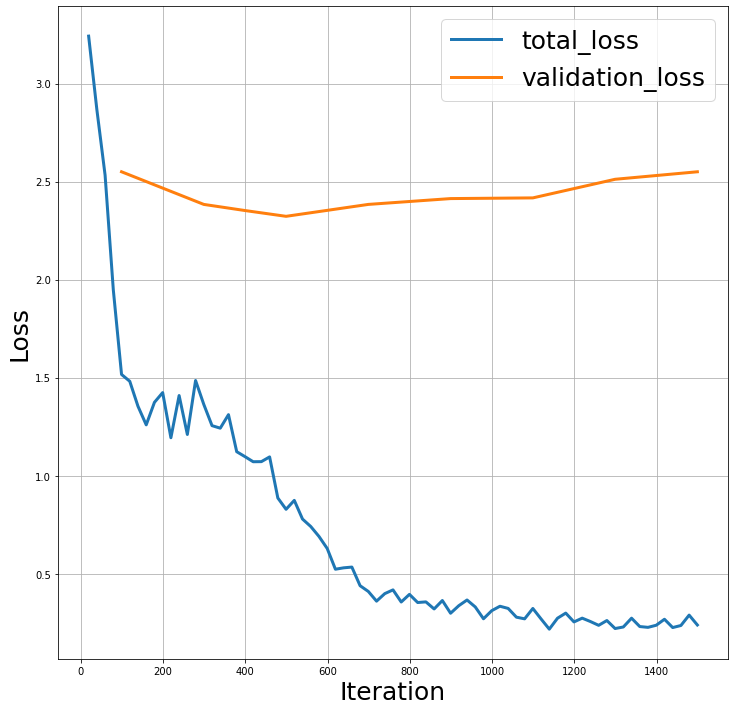

In [ ]:
import json
import matplotlib.pyplot as plt

experiment_folder = './output/'

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

metrics_path = os.path.join(experiment_folder, 'metrics.json')
experiment_metrics = load_json_arr(metrics_path)

# plot training loss
plt.figure(figsize=(12, 12))

X, Y = list(), list()
for m in experiment_metrics:
    if 'iteration' in m and 'total_loss' in m:
        X.append(m['iteration'])
        Y.append(m['total_loss'])
plt.plot(X, Y, linewidth=3)

# plot validation loss
X, Y = list(), list()
for m in experiment_metrics:
    if 'iteration' in m and 'validation_loss' in m:
        X.append(m['iteration'])
        Y.append(m['validation_loss'])
plt.plot(X, Y, linewidth=3)

# display
plt.ylabel('Loss', fontsize = 25)
plt.xlabel('Iteration', fontsize = 25)
plt.legend(['total_loss', 'validation_loss'], loc='upper right', fontsize = 25)
plt.grid(True)
plt.show()
